# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [33]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
import sqlalchemy
import sql_utilities as sqlutil
import support_functions as sf
from typing import *
import warnings
warnings.filterwarnings("ignore")
"""
##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger

    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )

    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))
""";

'\n##\ndef _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:\n    global logger\n\n    format_str = "%(asctime)s - %(levelname)s - %(message)s"\n    # configure\n    if fn_out is not None:\n        logging.basicConfig(\n            filename = fn_out,\n            filemode = "w",\n            format = format_str,\n            level = logging.DEBUG\n        )\n    else:\n        logging.basicConfig(\n            format = format_str,\n            level = logging.DEBUG\n        )\n\n    logger = logging.getLogger(namespace)\n    # create console handler and set level to debug\n    ch = logging.StreamHandler()\n    ch.setLevel(logging.DEBUG)\n    # create formatter\n    formatter = logging.Formatter(format_str)\n    # add formatter to ch\n    ch.setFormatter(formatter)\n    # add ch to logger\n    logger.addHandler(ch)\n\n    return logger\n\n_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))\n'

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [ ]:
# FOR DOCKER
"""
## load packages
import logging
import numpy as np
import os, os.path
import pandas as pd
import sisepuede as ssp
import sqlalchemy
import sql_utilities as sqlutil
import support_functions as sf

sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = ["brazil"]
)
"""

In [34]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    #"dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]


In [7]:
fs = sfs.SISEPUEDEFileStructure()
regions_run = pd.read_csv(os.path.join(fs.dir_tmp, "regions_run.csv"))
regions_run = list(regions_run["region"])

In [2]:
sisepuede = ssp.SISEPUEDE(
    "calibrated",
    id_str = "sisepuede_run_2023-07-13T11:05:33.605736",
    db_type = "csv",
    regions = ["chile"]#regions_run# "chile", "ecuador", "mexico"]
)



2023-07-13 12:10:56,902 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-07-13 12:10:56,906 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-07-13 12:10:56,906 - INFO - 	Setting export engine to 'csv'.
2023-07-13 12:10:56,907 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-07-13 12:10:56,908 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-07-13 12:10:56,908 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-07-13 12:10:56,909 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-07-13 12:10:56,910 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-07-13 12:10:56,910 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-07-13 12:10:56,911 - WARNING - No index fi

In [24]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    id_str = "sisepuede_run_2023-07-07T03:12:36.681600",
    regions = # "chile", "ecuador", "mexico"]
)
#id_str = "sisepuede_run_2023-02-28T20:47:55.917752",

2023-06-25 00:26:12,687 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-06-25 00:26:12,706 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-06-25 00:26:12,706 - INFO - 	Setting export engine to 'sqlite'.
2023-06-25 00:26:12,743 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-06-25 00:26:12,745 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-06-25 00:26:12,746 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-06-25 00:26:12,747 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-06-25 00:26:12,749 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-06-25 00:26:12,750 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-06-25 00:26:12,752 - WARNING - No index

## Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [4]:

# STRATS TO RUN


attr_strat = sisepuede.model_attributes.dict_attributes.get("dim_strategy_id")
dict_code_to_id = attr_strat.field_maps.get(f"strategy_code_to_{attr_strat.key}")
strat_codes_ignore = [
    # AFOLU
    "LNDU:INC_LAND_REHABILITIATION",
    "LSMM:INC_MANAGEMENT_CATTLE_PIGS",
    "LSMM:INC_MANAGEMENT_OTHER",
    "LSMM:INC_MANAGEMENT_POULTRY",
    "LSMM:INC_CAPTURE_BIOGAS",
    "TRWW:INC_COMPLIANCE_SEPTIC",
    "IPPU:DEC_OTHER_FCS",
    "IPPU:DEC_HFCS",
    "IPPU:DEC_PFCS",
    
    # ENERGY
    "TRNS:BUNDLE_DEMAND_MANAGEMENT",
    "TRNS:BUNDLE_DEMAND_MANAGEMENT_REP",
    "TRNS:BUNDLE_EFFICIENCY",
    "TRNS:BUNDLE_EFFICIENCY_REP",
    "TRNS:BUNDLE_FUEL_SWITCH",
    "TRNS:BUNDLE_FUEL_SWITCH_REP",
    "TRNS:BUNDLE_MODE_SHIFT",
    "TRNS:BUNDLE_MODE_SHIFT_REP"
]
strat_ids_drop = [
    dict_code_to_id.get(x) for x in strat_codes_ignore
]
strats_run = [x for x in attr_strat.key_values if x not in strat_ids_drop]



def get_strategies_from_codes(
    strategy_codes: Union[List[str], str],
) -> Union[List[int], None]:
    """
    Map codes to id as input
    """
    attr_strat = sisepuede.model_attributes.dict_attributes.get("dim_strategy_id")
    dict_map = attr_strat.field_maps.get(f"strategy_code_to_{attr_strat.key}")
    
    # check specification of codes
    strategy_codes = (
        [strategy_codes] 
        if isinstance(strategy_codes, str)
        else (
            strategy_codes
            if sf.islistlike(strategy_codes)
            else None
        )
    )
    if strategy_codes is None:
        return None
    
    # get ids to build
    strategies_build = [dict_map.get(x) for x in strategy_codes]
    strategies_build = [x for x in strategies_build if x is not None]
    out = (
        None
        if len(strategies_build) == 0
        else strategies_build
    )
    
    return out
    
strategy_codes_keep = [
    "BASE",
    "LNDU:PLUR",
    "PFLO:BETTER_BASE",
    "PFLO:CHANGE_CONSUMPTION",
    "PFLO:SUPPLY_SIDE_TECH",
    "PFLO:ALL_PLUR"
]
strategies_keep = get_strategies_from_codes(strategy_codes_keep)




dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": [0, 5008]#strategies_keep,# [0]#, 3067]#strats_run#, 3009]
}

if True:
    dict_primary_keys_out = sisepuede.project_scenarios(
        dict_filt,
        #check_results = False,
        chunk_size = 2,
        #regions = ["el_salvador", "jamaica", "uruguay"],#["dominican_republic", "chile", "ecuador"],#["brazil", "mexico"],
    )

2023-07-09 14:23:43,659 - INFO - 
***	STARTING REGION brazil	***

2023-07-09 14:23:44,954 - INFO - Trying run primary_id = 0 in region brazil
2023-07-09 14:23:44,955 - INFO - Running AFOLU model
2023-07-09 14:23:45,358 - INFO - AFOLU model run successfully completed
2023-07-09 14:23:45,359 - INFO - Running CircularEconomy model
2023-07-09 14:23:45,475 - INFO - CircularEconomy model run successfully completed
2023-07-09 14:23:45,476 - INFO - Running IPPU model
2023-07-09 14:23:45,647 - INFO - IPPU model run successfully completed
2023-07-09 14:23:45,648 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-07-09 14:23:45,688 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-07-09 14:23:45,916 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-07-09 14:23:45,917 - INFO - Running Energy model (Electricity and Fuel Production: trying t

2023-09-Jul 14:23:46.851 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-09-Jul 14:23:47.211 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-09-Jul 14:24:16.962 Started modeling scenario.
2023-09-Jul 14:25:57.243 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-07-09 14:25:57,972 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-09 14:25:58,059 - INFO - ElectricEnergy model run successfully completed
2023-07-09 14:25:58,060 - INFO - Running Energy (Fugitive Emissions)
2023-07-09 14:25:58,204 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-09 14:25:58,205 - INFO - Appending Socioeconomic outputs
2023-07-09 14:25:58,225 - INFO - Socioeconomic outputs successfully appended.
2023-07-09 14:25:58,237 - INFO - Model run for primary_id = 0 successfully completed in 133.28 seconds (n_tries = 1).
2023-07-09 14:25:58,341 - INFO - Trying run primary_id = 125125 in region brazil
2023-07-09 14:25:58,341 - INFO - Running AFOLU model
2023-07-09 14:25:58,758 - INFO - AFOLU model run

Set parameter TimeLimit to value 900
2023-09-Jul 14:26:01.770 Started modeling scenario.
2023-09-Jul 14:27:21.797 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-07-09 14:27:22,277 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-09 14:27:22,309 - INFO - ElectricEnergy model run successfully completed
2023-07-09 14:27:22,310 - INFO - Running Energy (Fugitive Emissions)
2023-07-09 14:27:22,405 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-09 14:27:22,405 - INFO - Appending Socioeconomic outputs
2023-07-09 14:27:22,420 - INFO - Socioeconomic outputs successfully appended.
2023-07-09 14:27:22,428 - INFO - Model run for primary_id = 125125 successfully completed in 84.09 seconds (n_tries = 1).
2023-07-09 14:27:22,606 - INFO - Table MODEL_OUTPUT successfully written to /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-09T14;18;03.884

Set parameter TimeLimit to value 900
2023-09-Jul 14:27:29.793 Started modeling scenario.
2023-09-Jul 14:28:56.807 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-07-09 14:28:57,201 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-09 14:28:57,230 - INFO - ElectricEnergy model run successfully completed
2023-07-09 14:28:57,231 - INFO - Running Energy (Fugitive Emissions)
2023-07-09 14:28:57,335 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-09 14:28:57,336 - INFO - Appending Socioeconomic outputs
2023-07-09 14:28:57,355 - INFO - Socioeconomic outputs successfully appended.
2023-07-09 14:28:57,362 - INFO - Model run for primary_id = 0 successfully completed in 92.6 seconds (n_tries = 1).
2023-07-09 14:28:57,469 - INFO - Trying run primary_id = 125125 in region mexico
2023-07-09 14:28:57,470 - INFO - Running AFOLU model
2023-07-09 14:28:57,872 - INFO - AFOLU model run s

Set parameter TimeLimit to value 900
2023-09-Jul 14:29:00.749 Started modeling scenario.
2023-09-Jul 14:30:30.087 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-07-09 14:30:30,637 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-09 14:30:30,704 - INFO - ElectricEnergy model run successfully completed
2023-07-09 14:30:30,705 - INFO - Running Energy (Fugitive Emissions)
2023-07-09 14:30:30,820 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-09 14:30:30,821 - INFO - Appending Socioeconomic outputs
2023-07-09 14:30:30,838 - INFO - Socioeconomic outputs successfully appended.
2023-07-09 14:30:30,844 - INFO - Model run for primary_id = 125125 successfully completed in 93.37 seconds (n_tries = 1).
2023-07-09 14:30:31,171 - INFO - Table MODEL_OUTPUT successfully appended to /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-09T14;18;03.88

# TROUBLESHOOT FUTURE GENERATION

In [46]:
ft = sisepuede.experimental_manager.dict_future_trajectories.get("chile")

ft.generate_future_from_lhs_vector()

In [47]:
dir(sisepuede.experimental_manager.dict_future_trajectories.get("chile"))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_initialize_dict_all_dims',
 '_initialize_input_database',
 '_initialize_sampling_units',
 '_log',
 '_set_xl_sampling_units',
 'all_sampling_units',
 'all_sampling_units_l',
 'all_sampling_units_x',
 'clean_sampling_unit_input_df',
 'dict_all_dimensional_values',
 'dict_baseline_ids',
 'dict_sampling_unit_to_xl_type',
 'dict_sampling_units',
 'fan_function_specification',
 'field_sample_unit_group',
 'field_time_period',
 'field_trajgroup_no_vary_q',
 'field_uniform_scaling_q',
 'field_variable',
 'field_variable_trajgroup',
 'field_variable_trajgroup_type',
 'generate_future_from_lhs_vector',
 'get_df_r

In [3]:
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": [0]
}

Object `sisepuede.project_scenarios` not found.


In [3]:
df_out_all = sisepuede.read_output(None)

In [70]:
ft = sisepuede.experimental_manager.dict_future_trajectories.get(region)
?ft.generate_future_from_lhs_vector

Signature:
ft.generate_future_from_lhs_vector(
    df_row_lhc_sample_x: Union[pandas.core.series.Series, pandas.core.frame.DataFrame, NoneType],
    df_row_lhc_sample_l: Union[pandas.core.series.Series, pandas.core.frame.DataFrame, NoneType] = None,
    future_id: Optional[int] = None,
    baseline_future_q: bool = False,
    dict_optional_dimensions: Dict[str, int] = {},
) -> pandas.core.frame.DataFrame
Docstring:
Build a data frame of a single future for all sample units

Function Arguments
------------------
- df_row_lhc_sample_x: data frame row with column names as sample groups 
        for all sample groups to vary with uncertainties OR None (acceptable
        if running baseline future)

Keyword Arguments
-----------------
- df_row_lhc_sample_l: data frame row with column names as sample groups 
        for all sample groups to vary with uncertainties
        * If None, lhs_trial_l = 1 in all samples (constant strategy effect 
                across all futures)
- future_id: op

In [75]:


region = "chile"
df_out = df_out_all[df_out_all["region"] == region]

all_primary_keys = list(df_out_all[sisepuede.key_primary].unique())
df_primary = sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key(all_primary_keys)
for k in range(21, 41):
    df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, k, False)

    print(f"{k}: {df_in.shape}")
    
    
if False:
    # write to output for testing
    df_in.to_csv(
        os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
        index = None,
        encoding = "UTF-8"
    )


"""

##  SPLIT FOR ATHENA

dfg = df_out_all.groupby([sisepuede.key_region])
dir_exp = os.path.join(sisepuede.file_struct.dir_out, "athena_test", sisepuede.id_fs_safe)

os.makedirs(dir_exp, exist_ok = True) if not os.path.exists(dir_exp) else None

for reg, df in dfg:
    
    fn_out = f"{sisepuede.database.table_name_output}_{reg}.csv"
    
    fp_out = os.path.join(dir_exp, fn_out)
    
    df.to_csv(
        fp_out,
        index = None,
        encoding = "UTF-8"
    )
    
    
    
    
    
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run,# [0]#, 3067]#strats_run#, 3009]
}
df = sisepuede.odpt_primary.get_indexing_dataframe(dict_filt)


set_filt = set(df["primary_id"]) - set(df_out["primary_id"])

df[df["primary_id"].isin(set_filt)]


idt = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT")
eng = idt.engine
fields_index = idt.fields_index
""";


df_in.dropna().shape

21: (4536, 2188)
22: (4536, 2188)
23: (4536, 2188)
24: (4536, 2188)
25: (4536, 2188)
26: (4536, 2188)
27: (4536, 2188)
28: (4536, 2188)
29: (4536, 2188)
30: (4536, 2188)
31: (4536, 2188)
32: (4536, 2188)
33: (4536, 2188)
34: (4536, 2188)
35: (4536, 2188)
36: (4536, 2188)
37: (4536, 2188)
38: (4536, 2188)
39: (4536, 2188)
40: (4536, 2188)


(4536, 2188)

In [82]:
df_all = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/sisepuede_launcher/query_retrieval_variables.csv")

In [84]:
df_lv = pd.read_csv("/Users/jsyme/Downloads/LOG_variables_searched-2.csv")
[print(x) for x in list(df_lv["x"]) if x not in list(df_all["field"])]



totalvalue_enfu_fuel_consumed_ccsq_fuel_electricity
totalvalue_enfu_fuel_consumed_entc_fuel_electricity
totalvalue_enfu_fuel_consumed_inen_fuel_electricity
totalvalue_enfu_fuel_consumed_scoe_fuel_electricity
totalvalue_enfu_fuel_consumed_trns_fuel_electricity
factor_waso_waste_per_capita_scalar_food
qty_agrc_food_produced_lost_sent_to_msw_tonne
factor_waso_waste_per_capita_scalar_food


[None, None, None, None, None, None, None, None]

In [12]:
dict_filt = {
    sisepuede.key_strategy: [0, 5008],
    sisepuede.key_future: [0],
    sisepuede.key_design: [0]
}

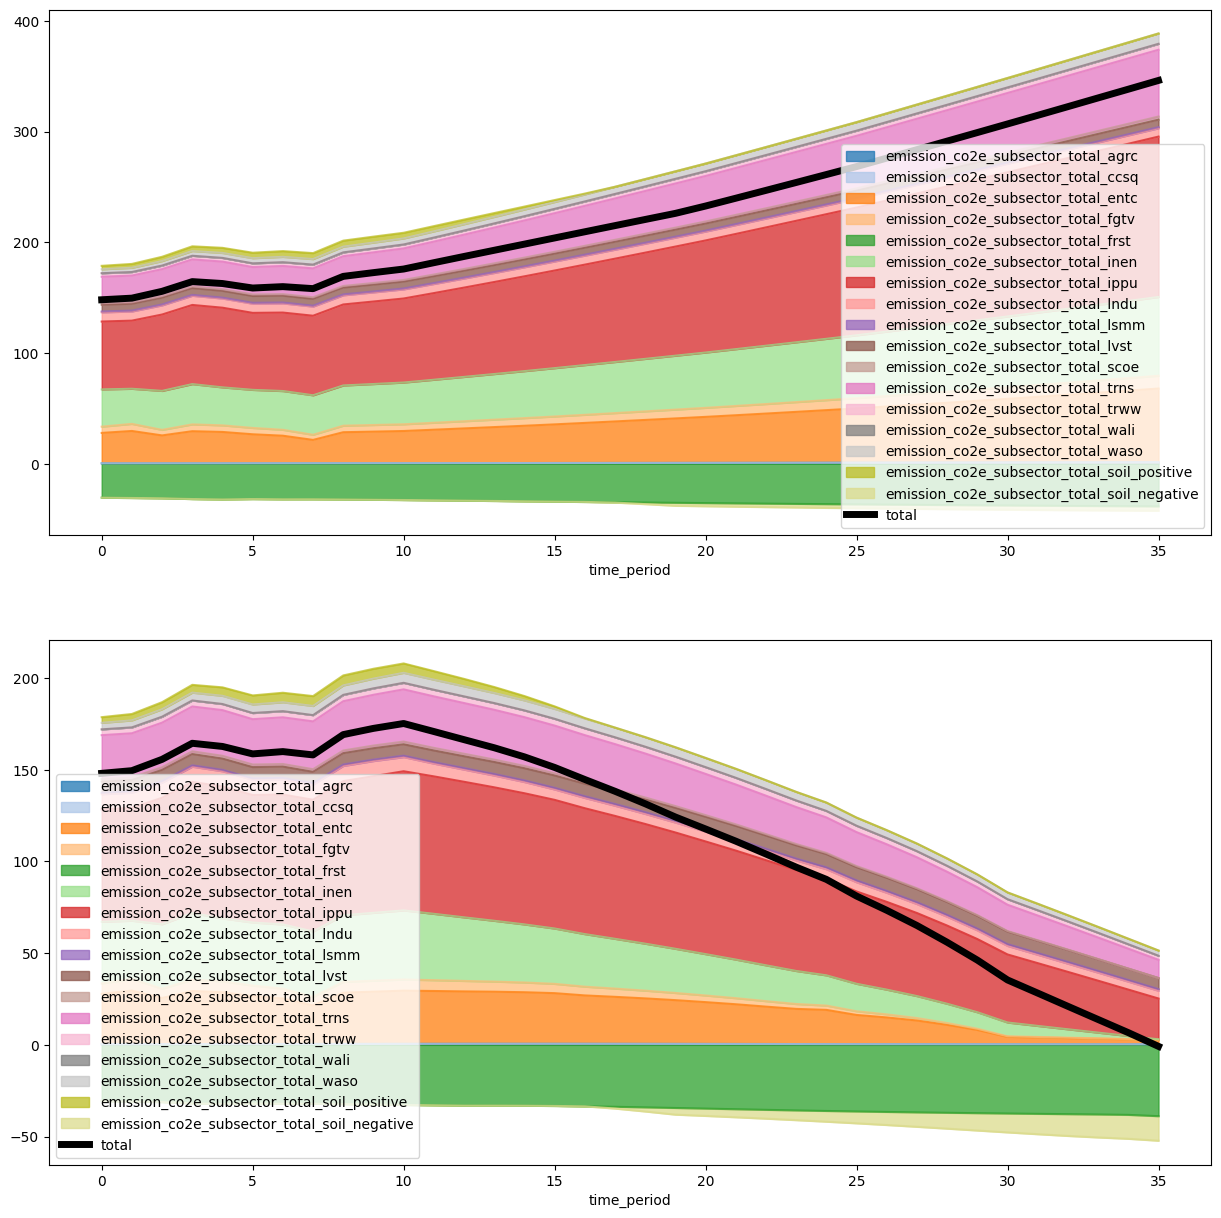

In [13]:

# 3008, 3009, 303
strat_id, strat_id_intervention = 0, 5008
future_id = 0

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    val = [future_id] if (k == sisepuede.key_future) else val
    dict_filt2.update({k: val[0]})

primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]

# intervention
dict_filt_invervention = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    val = [future_id] if (k == sisepuede.key_future) else val
    dict_filt_invervention.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_invervention)
df_filt_intervention = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]


df_in_filt = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id])
]

df_in_filt_intervention = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id_intervention])
]


fig, ax = plt.subplots(2, 1, figsize = (15, 15))
#ax[0].set_ylim(-150, 350)
#ax[0].set_ylim(0, 900)
#ax[1].set_ylim(0, 900)

palette_func = plt.cm.tab20#plt.cm.hsv

flds = [sisepuede.key_time_period]
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            False
            or ("ccsq" in x) 
            or ("entc" in x)
            or ("enfu" in x)
            or ("fgtv" in x)
            or ("inen" in x)
            or ("scoe" in x)
            or ("trns" in x)
        )
    ]
    
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            #True
            ("agrc" in x)
            or ("frst" in x)
            or ("lndu" in x)
            or ("lsmm" in x)
            or ("lvst" in x)
            or ("soil" in x)
            #("entc" in x) 
            #or ("scoe" in x)
            #or ("lsmm" in x)
            #or ("soil" in x)
            #or ("frst" in x)
            #or ("lndu" in x)
        )
    ]
    
if False:
    flds = [x for x in flds if "trns" in x]
    
if True:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_") 
        and (
            True
            #and ("lvst" in x)
            #or ("fgtv" in x)
            #and ("subsector_total" not in x)
            and ("subsector_total" in x)
            and 
            (
                True
                #("lvst" in x)
                #or ("lsmm" in x)
                #or ("soil" in x)
            )
        )
    ]

if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("energy_demand_enfu_") 
        and (
            True
            #("entc" in x)
            #or ("fgtv" in x)
            #("inen" in x)
            & ("subsector" in x)
            & ("electricity" in x)
        )
    ]

if False:
    #flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu") and ("total" in x) and ("subsector" not in x)]# and (("natural_gas" in x) or ("crude" in x) or ("electricity" in x) or ("hydrogen" in x))]
    cat = "rail_passenger"
    pre = "energy_consumption_trns"
    fld_ignore = f"{pre}_{cat}"
    flds = [sisepuede.key_time_period] + [x for x in df_filt.columns if x.startswith(pre) and (cat in x) and (x != fld_ignore)]
    #flds = [x for x in df_filt.columns if x.startswith("passenger_distance")]

add_total = True
plot_from_modvar = False

if True:

    # AFOLU
    modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_converted_from_type
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    #modvar_plot = sisepuede.models.model_afolu.modvar_soil_emissions_co2_urea
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_pop
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_adjusted_equivalent_exports

    #modvar_plot = sisepuede.models.model_afolu.modvar_frst_emissions_co2_sequestration
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_emissions_conv
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_emissions_ch4_ef
    #modvar_plot = sisepuede.models.model_afolu.modvar_lsmm_emissions_ch4
    
    
    # ENERGY
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_energy_consumption_total
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trde_demand_pkm
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_mass_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_exports_fuel_adjusted
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_total
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_trns
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_vehicle_distance_traveled_electricity
    
    #IPPU
    #modvar_plot = sisepuede.models.model_ippu.modvar_ippu_qty_total_production
    
    
    
    # NO INTERVENTION
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt,
        modvar_plot
    )
    df = pd.concat([df_filt[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt[flds] if (not plot_from_modvar) else df
    if len(df) > 0:
        for k in df.columns:
            vec = np.array(df[k])
            bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
            if (max(vec) > 0) and (min(vec) < 0):
                k0 = f"{k}_positive"
                k1 = f"{k}_negative"
                df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
                df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
                df.drop([k], axis = 1, inplace = True)
            else:
                df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[0], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[0], color = "black", linewidth = 5)
    df_plot_noint = df.copy()
        
        
    # INTERVENTION
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt_intervention,
        modvar_plot
    )
    df = pd.concat([df_filt_intervention[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt_intervention[flds] if (not plot_from_modvar) else df
    
    if False:
        # UNCOMMENT TO USE DIFF
        vec = np.array(df[sisepuede.key_time_period])
        flds = [x for x in df.columns if (x != sisepuede.key_time_period)]
        df = pd.DataFrame(np.array(df_filt_intervention[flds]) - np.array(df_filt[flds]), columns = flds)
        df[sisepuede.key_time_period] = vec

    
    
    for k in df.columns:
        vec = np.array(df[k])
        bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
        if (max(vec) > 0) and (min(vec) < 0):
            k0 = f"{k}_positive"
            k1 = f"{k}_negative"
            df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
            df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
            df.drop([k], axis = 1, inplace = True)
        else:
            df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[1], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[1], color = "black", linewidth = 5)
    df_plot_int = df.copy()
    #df.plot(ax = ax[1], color = colors)



In [24]:
set(df_in.columns) - set(sisepuede.model_attributes.all_variables_input)



{'future_id', 'strategy_id', 'time_period'}

In [22]:
sisepuede.model_attributes.build_varlist(
    None,
    "Change to Net Imports of Livestock"
)

['net_imports_change_lvst_buffalo',
 'net_imports_change_lvst_cattle_dairy',
 'net_imports_change_lvst_cattle_nondairy',
 'net_imports_change_lvst_chickens',
 'net_imports_change_lvst_goats',
 'net_imports_change_lvst_horses',
 'net_imports_change_lvst_mules',
 'net_imports_change_lvst_pigs',
 'net_imports_change_lvst_sheep']

In [38]:
sisepuede.model_attributes.get_standard_variables(
    df_filt,
    sisepuede.models.model_afolu.modvar_lndu_area_converted
).sum(axis = 1)

modaf = sisepuede.models.model_afolu



['Livestock Manure Management Fraction Anaerobic Digester',
 'Livestock Manure Management Fraction Anaerobic Lagoon',
 'Livestock Manure Management Fraction Composting',
 'Livestock Manure Management Fraction Daily Spread',
 'Livestock Manure Management Fraction Deep Bedding',
 'Livestock Manure Management Fraction Dry Lot',
 'Livestock Manure Management Fraction Incineration',
 'Livestock Manure Management Fraction Liquid Slurry',
 'Livestock Manure Management Fraction Paddock Pasture Range',
 'Livestock Manure Management Fraction Poultry Manure',
 'Livestock Manure Management Fraction Solid Storage']

In [17]:
df_filt[[
    x for x in df_filt.columns if ("energy_consumption" in x) and ("scoe" in x)
]]

,energy_consumption_electricity_scoe_commercial_municipal,energy_consumption_electricity_scoe_other_se,energy_consumption_electricity_scoe_residential,energy_consumption_electricity_scoe_total,energy_consumption_scoe_commercial_municipal,energy_consumption_scoe_other_se,energy_consumption_scoe_residential,energy_consumption_scoe_total
0,708.052728,0.0,707.279130,1415.331858,744.100000,0.0,744.100000,1488.200000
1,712.704081,0.0,706.614579,1419.318660,749.141891,0.0,743.365258,1492.507150
2,717.400525,0.0,703.008161,1420.408686,754.272711,0.0,739.569369,1493.842080
3,722.047904,0.0,719.039733,1441.087637,758.604853,0.0,756.312638,1514.917491
4,726.809690,0.0,707.694656,1434.504346,763.846399,0.0,744.400737,1508.247136
5,731.538781,0.0,695.381297,1426.920077,771.257589,0.0,731.448719,1502.706308
6,741.012949,0.0,687.456756,1428.469705,780.726159,0.0,723.113155,1503.839314
7,750.503935,0.0,693.759572,1444.263507,790.654735,0.0,729.742881,1520.397615
8,759.995212,0.0,700.156214,1460.151427,800.591284,0.0,736.471298,1537.062582
9,769.486778,0.0,706.645291,1476.132069,810.535732,0.0,743.296945,1553.832677


In [27]:
# UNCOMMENT TO USE DIFF
vec = np.array(df[sisepuede.key_time_period])
        

In [32]:
flds = [x for x in df.columns if (x != sisepuede.key_time_period)]
df = pd.DataFrame(np.array(df_filt_intervention[flds]) - np.array(df_filt[flds]), columns = flds)

#df[sisepuede.key_time_period] = vec




In [23]:
275*0.07
2.7*25

67.5

In [21]:
df_plot_noint.drop(["time_period"], axis = 1).tail()

,energy_demand_enfu_subsector_total_pj_trns_fuel_biofuels,energy_demand_enfu_subsector_total_pj_trns_fuel_biogas,energy_demand_enfu_subsector_total_pj_trns_fuel_biomass,energy_demand_enfu_subsector_total_pj_trns_fuel_coal,energy_demand_enfu_subsector_total_pj_trns_fuel_coke,energy_demand_enfu_subsector_total_pj_trns_fuel_diesel,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity,energy_demand_enfu_subsector_total_pj_trns_fuel_furnace_gas,energy_demand_enfu_subsector_total_pj_trns_fuel_gasoline,energy_demand_enfu_subsector_total_pj_trns_fuel_geothermal,...,energy_demand_enfu_subsector_total_pj_trns_fuel_hydrogen,energy_demand_enfu_subsector_total_pj_trns_fuel_hydropower,energy_demand_enfu_subsector_total_pj_trns_fuel_kerosene,energy_demand_enfu_subsector_total_pj_trns_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_trns_fuel_ocean,energy_demand_enfu_subsector_total_pj_trns_fuel_oil,energy_demand_enfu_subsector_total_pj_trns_fuel_other,energy_demand_enfu_subsector_total_pj_trns_fuel_solar,energy_demand_enfu_subsector_total_pj_trns_fuel_waste,energy_demand_enfu_subsector_total_pj_trns_fuel_wind
31,0.0,0.0,0.0,0.0,0.0,690.899912,11.259337,0.0,1615.227577,0.0,...,0.0,0.0,375.364600,0.000732,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,701.882535,11.735669,0.0,1639.771034,0.0,...,0.0,0.0,396.496547,0.000752,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,712.770273,12.223106,0.0,1663.981931,0.0,...,0.0,0.0,418.290099,0.000771,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,723.595051,12.721698,0.0,1687.940077,0.0,...,0.0,0.0,440.748751,0.000791,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,734.387026,13.231493,0.0,1711.722147,0.0,...,0.0,0.0,463.875827,0.000811,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_plot_int.drop(["time_period"], axis = 1).tail()


,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_soil,total
319,37.511740,-512.846381,423.828110,87.228297,790.904192,146.596207,973.222166
320,37.655498,-516.199462,428.435011,89.472132,811.485352,148.823661,999.672192
321,37.787813,-519.561488,432.824846,91.781538,832.670703,151.107090,1026.610502
322,37.907490,-522.927942,436.995957,94.157820,854.472216,153.449251,1054.054793
323,38.013261,-526.294709,433.083277,96.602286,876.901894,155.830767,1074.136776


In [201]:
flds_check = [x for x in df_filt.columns if ("emission_co2e_subsector_total" in x)]
df_filt[flds_check].sum(axis = 1)

0     1939.655692
1     1914.143685
2     1820.082401
3     1916.400618
4     1926.261493
5     1952.534867
6     2007.950141
7     2009.833905
8     2088.575188
9     2136.274521
10    2184.362741
11    2244.594712
12    2305.203543
13    2366.346176
14    2428.046056
15    2490.317728
16    2552.159900
17    2614.820295
18    2677.954652
19    2741.564178
20    2807.814903
21    2875.883293
22    2944.977101
23    3015.051482
24    3086.288576
25    3158.783261
26    3232.674573
27    3307.876697
28    3384.420817
29    3462.359716
30    3541.734124
31    3622.235054
32    3704.317134
33    3788.010867
34    3873.370128
35    3952.527347
dtype: float64

In [194]:
flds_check = [x for x in df_filt.columns if ("emission_co2e" in x) and ("lvst" in x)]
df_filt_intervention[flds_check].tail()


,emission_co2e_ch4_lvst_entferm_buffalo,emission_co2e_ch4_lvst_entferm_cattle_dairy,emission_co2e_ch4_lvst_entferm_cattle_nondairy,emission_co2e_ch4_lvst_entferm_chickens,emission_co2e_ch4_lvst_entferm_goats,emission_co2e_ch4_lvst_entferm_horses,emission_co2e_ch4_lvst_entferm_mules,emission_co2e_ch4_lvst_entferm_pigs,emission_co2e_ch4_lvst_entferm_sheep,emission_co2e_subsector_total_lvst
319,2.318018,440.135897,304.585571,0.0,1.545721,3.346193,0.295618,1.327320,3.292024,756.846361
320,2.207403,417.467794,290.106719,0.0,1.465138,3.222423,0.284371,1.312217,3.120661,719.186727
321,2.105817,396.601127,276.814498,0.0,1.391089,3.109600,0.274072,1.296778,2.963299,684.556280
322,2.012694,377.429623,264.635562,0.0,1.323132,3.007216,0.264676,1.281015,2.818989,652.772906
323,1.927335,359.818289,253.477610,0.0,1.260731,2.914530,0.256117,1.264939,2.686593,623.606144


In [49]:
import support_classes as sc
fp = "/Users/jsyme/Documents/Projects/git_jbus/sisepuede_data/SocioEconomic/gdp_mmm_usd/input_to_sisepuede"
df1 = os.path.join(fp, "historical", "gdp_mmm_usd.csv")
df2 = os.path.join(fp, "projected", "gdp_mmm_usd.csv")

df1 = pd.read_csv(df1)
df2 = pd.read_csv(df2)


regions = sc.Regions(sisepuede.model_attributes)


df = pd.concat([df1, df2]).drop(["Nation"], axis = 1)
df["future_id"] = 0

df["region"] = df["iso_code3"].apply(regions.return_region_or_iso)
df = (
    df[~df["region"].isin([None])][["future_id", "region",  "iso_code3", "Year", "gdp_mmm_usd"]]
    .rename(columns = {"Year": "year", "iso_code3": "iso_alpha_3"})
    .sort_values(by = ["iso_alpha_3", "year"])
    .reset_index(drop = True)
)

df.to_csv("~/Desktop/gdp_mmm_usd_all_regions_example.csv", index = None, encoding = "UTF-8")






In [137]:
df_xx = df_in[df_in["strategy_id"].isin([3019])]
df_xx[
    [
        x for x in df_xx.columns 
        if ("enfu" in x)
        and ("exports" in x)
    ]
];


df_filt_intervention[
    [
        x for x in df_filt_intervention.columns 
        if ("enfu" in x)
        and ("prod" in x)
    ]
]

,prod_enfu_fuel_coal_pj,prod_enfu_fuel_crude_pj,prod_enfu_fuel_diesel_pj,prod_enfu_fuel_electricity_pj,prod_enfu_fuel_gasoline_pj,prod_enfu_fuel_hydrocarbon_gas_liquids_pj,prod_enfu_fuel_hydrogen_pj,prod_enfu_fuel_kerosene_pj,prod_enfu_fuel_natural_gas_pj,prod_enfu_fuel_oil_pj
900,5.755845e+02,12314.837690,2927.906952,4053.156355,4724.689191,442.136626,0.563995,847.603916,1639.188016,138.555381
901,5.177894e+02,12315.097111,2862.538385,4003.330685,4619.205592,427.408908,0.563995,828.680277,1435.603241,135.461988
902,1.456144e+02,3823.567418,427.869287,30.129249,690.441817,76.221757,0.563995,123.864484,638.747648,20.247772
903,5.401905e+02,12241.214514,2842.357501,4107.554236,4586.640212,425.190465,0.563995,822.838084,1452.810300,134.506982
904,5.215509e+02,12210.399340,2833.940398,4118.262990,4573.057746,425.032187,0.563995,820.401405,1486.359529,134.108665
905,4.579866e+02,12402.542160,2886.423825,4127.812634,4657.748921,428.609211,0.563995,835.594907,1366.227404,136.592303
906,4.872993e+02,12393.374534,2883.919706,4168.769340,4653.708088,438.423164,0.563995,834.869986,1715.271038,136.473802
907,4.042478e+02,12431.845302,2894.427920,4167.066706,4670.664925,417.906861,0.563995,837.912023,961.158949,136.971075
908,4.833078e+02,12650.257594,2954.086800,4238.720382,4766.934948,439.017994,0.563995,855.182757,1410.681026,139.794273
909,4.886075e+02,12800.693694,2995.178120,4284.611977,4833.242969,444.829724,0.563995,867.078341,1420.160050,141.738810


In [104]:
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    modvar_plot
    #sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_entc
)
#df = pd.concat([df_filt[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
#df.sum(axis = 1)
flds = [x for x in df.columns if set(df[x]) != set([0.0])]
df[flds].sum(axis = 1)

0     466.901106
1     492.407735
2     475.949551
3     517.080902
4     518.462917
5     502.230656
6     505.482541
7     514.001909
8     523.147115
9     532.416054
10    541.802427
11    556.856314
12    572.150352
13    587.673830
14    603.417150
15    619.371851
16    634.975555
17    650.445528
18    666.079870
19    681.873172
20    697.820744
21    714.650132
22    731.642142
23    748.793681
24    766.102305
25    783.566017
26    802.009108
27    820.621231
28    839.402260
29    858.352465
30    877.472611
31    896.675112
32    916.061486
33    935.634457
34    955.397120
35    975.353067
dtype: float64

In [103]:
df2 = sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    modvar_plot
    #sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_entc
)
#df = pd.concat([df_filt[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
#df.sum(axis = 1)
flds = [x for x in df2.columns if set(df2[x]) != set([0.0])]
df2[flds].sum(axis = 1)

0     466.901155
1     492.407735
2     475.949551
3     517.080902
4     518.462917
5     502.230656
6     505.482541
7     514.001909
8     523.147115
9     532.416054
10    541.802427
11    556.440118
12    571.292432
13    586.347740
14    601.042051
15    615.542228
16    629.870926
17    645.102053
18    659.659159
19    674.319645
20    689.076721
21    704.642666
22    720.305872
23    736.060281
24    751.900123
25    767.819655
26    784.616709
27    801.857754
28    819.261244
29    836.767795
30    857.111771
31    884.711230
32    906.522424
33    925.367859
34    952.460681
35    960.584676
dtype: float64

In [61]:
#df_filt["emission_co2e_subsector_total_frst"].plot.area()

df_filt[[x for x in df_filt.columns if ("fp_hydrogen" in x)]].iloc[35]

emission_co2e_ch4_entc_processing_and_refinement_fp_hydrogen_electrolysis    0.000000
emission_co2e_ch4_entc_processing_and_refinement_fp_hydrogen_gasification    0.000000
emission_co2e_ch4_entc_processing_and_refinement_fp_hydrogen_reformation     0.000000
emission_co2e_co2_entc_processing_and_refinement_fp_hydrogen_electrolysis    0.000000
emission_co2e_co2_entc_processing_and_refinement_fp_hydrogen_gasification    0.000000
emission_co2e_co2_entc_processing_and_refinement_fp_hydrogen_reformation     0.041886
emission_co2e_n2o_entc_processing_and_refinement_fp_hydrogen_electrolysis    0.000000
emission_co2e_n2o_entc_processing_and_refinement_fp_hydrogen_gasification    0.000000
emission_co2e_n2o_entc_processing_and_refinement_fp_hydrogen_reformation     0.000000
nemomod_entc_discounted_capital_investment_fp_hydrogen_electrolysis          0.000000
nemomod_entc_discounted_capital_investment_fp_hydrogen_gasification          0.000000
nemomod_entc_discounted_capital_investment_fp_hydrogen

In [50]:
df_filt_intervention[[x for x in df_filt_intervention.columns if ("fp_hydrogen" in x)]].iloc[35]

emission_co2e_ch4_entc_processing_and_refinement_fp_hydrogen_electrolysis    0.000000
emission_co2e_ch4_entc_processing_and_refinement_fp_hydrogen_gasification    0.000000
emission_co2e_ch4_entc_processing_and_refinement_fp_hydrogen_reformation     0.000000
emission_co2e_co2_entc_processing_and_refinement_fp_hydrogen_electrolysis    0.000000
emission_co2e_co2_entc_processing_and_refinement_fp_hydrogen_gasification    0.000000
emission_co2e_co2_entc_processing_and_refinement_fp_hydrogen_reformation     0.000000
emission_co2e_n2o_entc_processing_and_refinement_fp_hydrogen_electrolysis    0.000000
emission_co2e_n2o_entc_processing_and_refinement_fp_hydrogen_gasification    0.000000
emission_co2e_n2o_entc_processing_and_refinement_fp_hydrogen_reformation     0.000000
nemomod_entc_discounted_capital_investment_fp_hydrogen_electrolysis          0.000000
nemomod_entc_discounted_capital_investment_fp_hydrogen_gasification          0.000000
nemomod_entc_discounted_capital_investment_fp_hydrogen

In [11]:
#import sql_utilities as sqlutil
df_msp = sqlutil.sql_table_to_df(
    engine,
    sisepuede.model_attributes.table_nemomod_min_share_production
)

In [14]:
df_msp[
    df_msp["f"].isin(["fuel_electricity"]) &
    df_msp["y"].isin(["1000"])
]

,id,r,t,f,y,val
0,1,brazil,pp_coal,fuel_electricity,1000,0.043489
36,37,brazil,pp_gas,fuel_electricity,1000,0.127817
72,73,brazil,pp_geothermal,fuel_electricity,1000,0.000000
108,109,brazil,pp_hydropower,fuel_electricity,1000,0.608398
144,145,brazil,pp_nuclear,fuel_electricity,1000,0.023829
180,181,brazil,pp_oil,fuel_electricity,1000,0.046142
216,217,brazil,pp_solar,fuel_electricity,1000,0.000100
252,253,brazil,pp_wind,fuel_electricity,1000,0.000000
396,397,brazil,supply_fuel_electricity,fuel_electricity,1000,0.065762


In [79]:
df = sisepuede.model_attributes.get_standard_variables(
    df_in_filt,
    sisepuede.models.model_electricity.modvar_entc_nemomod_min_share_production
    #sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
)
df_int = sisepuede.model_attributes.get_standard_variables(
    df_in_filt_intervention,
    sisepuede.models.model_electricity.modvar_entc_nemomod_min_share_production
    #sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
)

df[[x for x in df.columns if "_pp_" in x]].sum(axis = 1)

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     0.907371
7     0.905674
8     0.906631
9     0.906631
10    0.906631
11    0.906631
12    0.906631
13    0.906631
14    0.906631
15    0.906631
16    0.906631
17    0.906631
18    0.906631
19    0.906631
20    0.906631
21    0.906631
22    0.906631
23    0.906631
24    0.906631
25    0.906631
26    0.906631
27    0.906631
28    0.906631
29    0.906631
30    0.906631
31    0.906631
32    0.906631
33    0.906631
34    0.906631
35    0.906631
dtype: float64

In [80]:
df_int[[x for x in df_int.columns if "_pp_" in x]].sum(axis = 1)

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     0.907371
7     0.905674
8     0.906631
9     0.906631
10    0.906631
11    0.912416
12    0.918202
13    0.923987
14    0.929772
15    0.935558
16    0.941343
17    0.947128
18    0.952914
19    0.958699
20    0.964484
21    0.970270
22    0.976055
23    0.981841
24    0.987626
25    0.993411
26    0.999197
27    1.004982
28    1.010767
29    1.016553
30    1.022338
31    1.037749
32    1.053160
33    1.068571
34    1.083982
35    1.099394
dtype: float64

In [8]:
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
)
df_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
)

In [9]:
##  BASELINE
df.iloc[[0, 35]]

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels,nemomod_entc_annual_production_by_technology_st_pumped_hydro
0,0.0,17.138944,149.337441,0.0,438.912724,0.0,0.0,2089.185674,81.827453,0.0,158.448101,61.266575,0.0,126.300108,0.000000,0.0,0.0,0.0
35,0.0,0.000000,157.778806,0.0,451.605836,0.0,0.0,3230.803594,111.456776,0.0,121.806727,173.969156,0.0,401.792574,98.999994,0.0,0.0,0.0


In [10]:
##  WITH INTERVENTION
df_int.iloc[[0, 35]]

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels,nemomod_entc_annual_production_by_technology_st_pumped_hydro
0,0.0,17.138944,144.213725,0.0,423.853779,0.0,0.000000,2062.561041,79.019982,0.0,153.011801,112.074026,0.0,128.927380,0.000000,0.0,0.0,0.0
35,0.0,0.000000,0.000000,0.0,0.000000,0.0,461.686429,2931.674573,0.000000,0.0,0.000000,692.529643,0.0,692.529643,98.999994,0.0,0.0,0.0


In [72]:

# aviation PKM reduction
print("passenger_distance_traveled_trns_aviation")
print(1 - 1.074556e+11/1.432742e+11)
print("\n")



passenger_distance_traveled_trns_aviation
0.2500003489811843




In [37]:
# freight rail emissions reduction
print("emission_co2e_co2_trns_rail_freight")
print(1 - 2.215998/2.954664)
print("\n")

# passenger rail emissions reduction
print("emission_co2e_co2_trns_rail_passenger change:")
print(1 - 0.756085/1.008113)

emission_co2e_co2_trns_rail_freight
0.2500000000000001


emission_co2e_co2_trns_rail_passenger change:
0.24999975201192726


In [131]:
arr_int = np.array(df_int)
arr_int_norm = (arr_int.transpose()/arr_int.sum(axis = 1)).transpose()

pd.DataFrame(arr_int_norm, columns = list(df_int.columns)).iloc[[0, 35]]

,mass_distance_traveled_trns_mt_km_aviation,mass_distance_traveled_trns_mt_km_rail_freight,mass_distance_traveled_trns_mt_km_road_heavy_freight,mass_distance_traveled_trns_mt_km_water_borne
0,0.0,0.342506,0.577156,0.080338
35,0.0,0.514691,0.388331,0.096978


In [133]:
arr = np.array(df)
arr_norm = (arr.transpose()/arr.sum(axis = 1)).transpose()

pd.DataFrame(arr_norm, columns = list(df.columns)).iloc[[0, 35]]

,mass_distance_traveled_trns_mt_km_aviation,mass_distance_traveled_trns_mt_km_rail_freight,mass_distance_traveled_trns_mt_km_road_heavy_freight,mass_distance_traveled_trns_mt_km_water_borne
0,0.0,0.342506,0.577156,0.080338
35,0.0,0.314691,0.588331,0.096978


In [46]:
sisepuede.model_attributes.get_standard_variables(
    df_in_filt,
    sisepuede.models.model_socioeconomic.modvar_econ_gdp
).iloc[[0, 35]].sum(axis = 1)

0     2431.942902
35    4261.821169
dtype: float64

In [48]:
4261.821169/2431.942902


1.752434716084465

In [24]:
[x for x in df_out.columns if "harvested" in x]

df_out[[x for x in df_out.columns if x.startswith("dem_ippu_harvested_wood_tonne")]]


,dem_ippu_harvested_wood_tonne_paper,dem_ippu_harvested_wood_tonne_wood
0,1.574719e+07,1.499843e+06
1,1.573242e+07,1.496707e+06
2,1.571764e+07,1.493564e+06
3,1.570284e+07,1.490414e+06
4,1.568805e+07,1.487258e+06
...,...,...
4207,1.498061e+07,2.014076e+06
4208,1.506952e+07,2.037152e+06
4209,1.515689e+07,2.059962e+06
4210,1.524277e+07,2.082517e+06


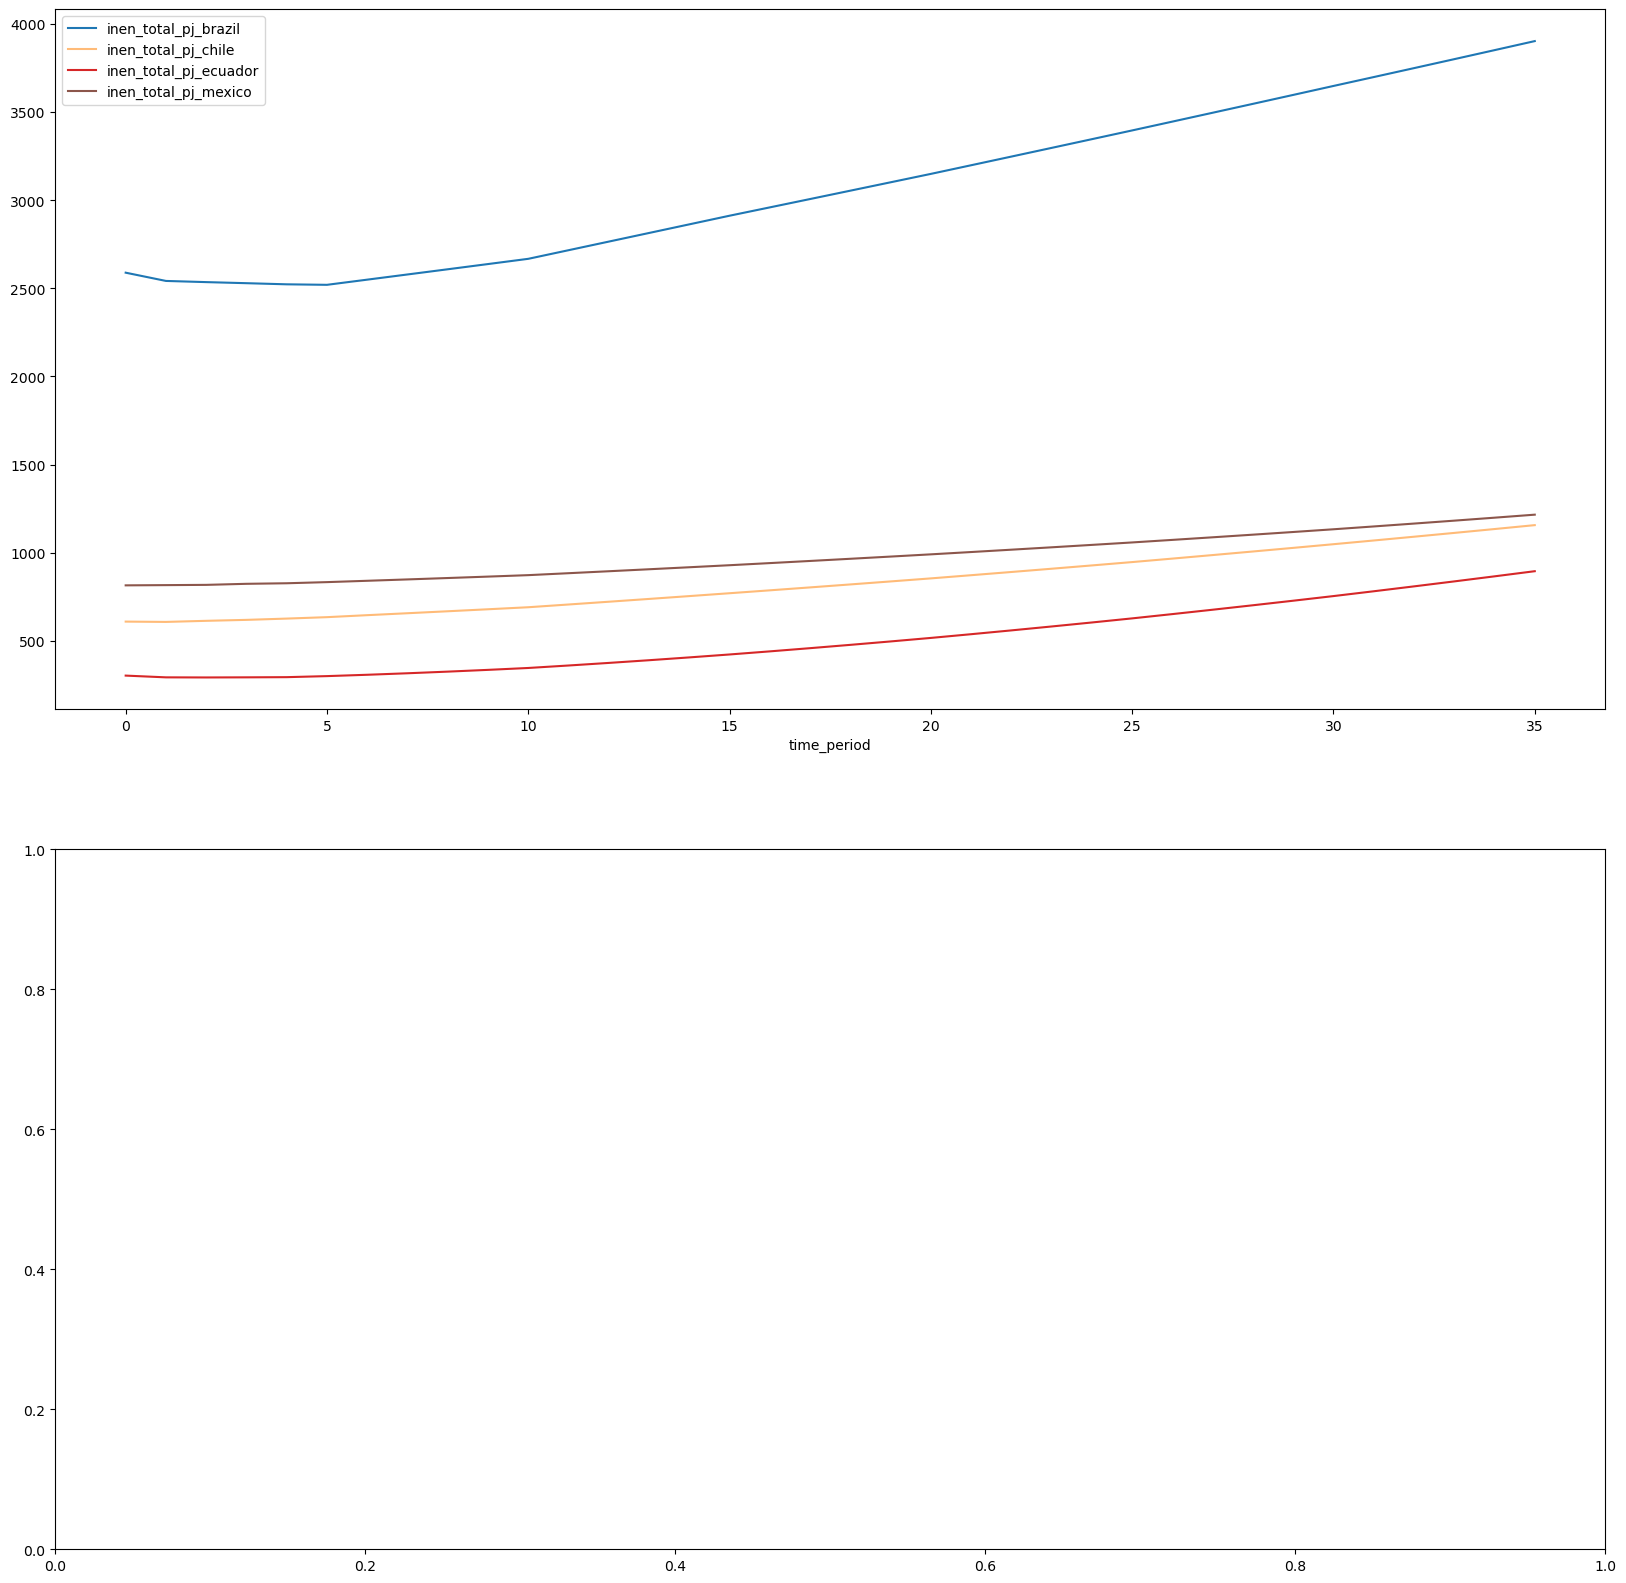

In [24]:
# 3008, 3009, 3031
strat_id, strat_id_intervention = 0, 3011
# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

flds =[x for x in df_filt.columns if "energy_demand_enfu_subsector_total_pj_inen" in x]
df_out_cur = df_out_all[df_out_all[sisepuede.key_primary].isin([primary_id])]
flds_plot = []

df_out_tmp = df_out_cur[["time_period"]].drop_duplicates()
 
for region in df_out_cur["region"].unique():
    fld_temp = f"inen_total_pj_{region}"
    vec_new = np.array(df_out_cur[df_out_cur["region"] == region][flds]).sum(axis = 1)
    df_out_tmp[fld_temp] = vec_new


fig, ax = plt.subplots(2, 1, figsize = (20, 20))
#ax[0].set_ylim(0, 140)
#ax[1].set_ylim(0, 140)

palette_func = plt.cm.tab20#plt.cm.hsv



#flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu_total")]

if True:
    
    
  
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df_out_tmp.plot(ax = ax[0], color = colors, x = "time_period")
    



In [94]:
sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    modvar_plot
)

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels,nemomod_entc_annual_production_by_technology_st_pumped_hydro
0,0.0,0.354658,110.181308,0.0,606.997704,0.0,20.485735,104.612210,38.193334,0.0,102.910408,4.832510,0.0,28.884861,0.0,0.455136,0.0,0.0
1,0.0,0.000000,108.857906,0.0,605.039246,0.0,19.485955,99.551780,34.379900,0.0,106.765150,6.151372,0.0,33.251960,0.0,0.000000,0.0,0.0
2,0.0,0.000000,38.488857,0.0,235.504724,0.0,7.335627,41.185606,13.718781,0.0,47.715704,3.569829,0.0,13.222799,0.0,0.001167,0.0,0.0
3,0.0,0.000000,78.952164,0.0,586.438289,0.0,15.576106,98.922043,40.751867,0.0,136.432902,10.715715,0.0,39.145294,0.0,0.000000,0.0,0.0
4,0.0,0.000000,79.270701,0.0,589.519384,0.0,16.181383,75.254141,34.789494,0.0,138.391093,28.712121,0.0,53.643794,0.0,0.000000,0.0,0.0
5,0.0,0.000000,45.531500,0.0,603.941333,0.0,15.819066,84.729042,34.431263,0.0,141.776680,35.622040,0.0,62.633738,0.0,0.000000,0.0,0.0
6,0.0,0.000000,31.542750,0.0,590.002799,0.0,14.481695,105.559821,35.010187,0.0,138.504576,43.368637,0.0,64.219105,0.0,0.000000,0.0,0.0
7,0.0,0.000000,59.960079,0.0,563.777158,0.0,15.049600,111.138692,30.791657,0.0,144.457445,41.270253,0.0,61.731131,0.0,0.001167,0.0,0.0
8,0.0,0.000000,91.166598,0.0,592.605868,0.0,18.684044,109.564881,35.054609,0.0,142.374647,16.669953,0.0,35.513726,0.0,0.000000,0.0,0.0
9,0.0,0.000000,92.014664,0.0,598.118511,0.0,18.857850,110.584095,35.380700,0.0,143.699069,16.825024,0.0,35.844088,0.0,0.000000,0.0,0.0


In [115]:
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary

,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,5005,0,3001,0
2,6006,0,3002,0
3,7007,0,3003,0
4,8008,0,3004,0
5,11011,0,3007,0
6,13013,0,3009,0
7,15015,0,3011,0
8,28028,0,3024,0
9,30030,0,3026,0


In [109]:
df_filt_intervention[[x for x in df_filt_intervention.columns if x.startswith("emission_co2e_subsector_total")]].sum(axis = 1)

1872     743.499739
1873     750.980582
1874     674.385358
1875     744.540177
1876     753.344259
1877     760.378541
1878     764.571908
1879     776.302035
1880     792.501100
1881     803.175662
1882     813.762094
1883     825.258350
1884     835.938767
1885     846.534056
1886     857.002696
1887     867.308429
1888     877.494595
1889     887.364259
1890     896.996591
1891     906.367826
1892     915.773864
1893     925.118775
1894     934.296934
1895     943.417999
1896     952.501368
1897     961.566679
1898     970.768827
1899     979.878961
1900     989.040483
1901     998.267345
1902    1007.573282
1903    1017.181265
1904    1026.756185
1905    1036.463221
1906    1046.310025
1907    1054.464651
dtype: float64

In [15]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")


In [19]:
df = sqlutil.sql_table_to_df(engine, "vdiscountedcapitalinvestment")

df[df["y"] == "1000"]

,r,t,y,val,solvedtm
0,mexico,pp_coal,1000,5.141651e+03,2023-03-07 17:33:07.549
1,mexico,pp_gas,1000,2.500525e+04,2023-03-07 17:33:07.549
2,mexico,pp_nuclear,1000,8.171675e+03,2023-03-07 17:33:07.549
3,mexico,pp_wind,1000,4.459853e+03,2023-03-07 17:33:07.549
4,mexico,supply_fuel_coal,1000,1.853715e+06,2023-03-07 17:33:07.549
5,mexico,supply_fuel_diesel,1000,5.060592e+06,2023-03-07 17:33:07.549
6,mexico,supply_fuel_electricity,1000,1.231551e+05,2023-03-07 17:33:07.549
7,mexico,supply_fuel_gasoline,1000,1.046768e+07,2023-03-07 17:33:07.549
8,mexico,supply_fuel_hydrocarbon_gas_liquids,1000,7.175443e+05,2023-03-07 17:33:07.549
9,mexico,supply_fuel_hydrogen,1000,7.209993e+01,2023-03-07 17:33:07.549


<AxesSubplot:>

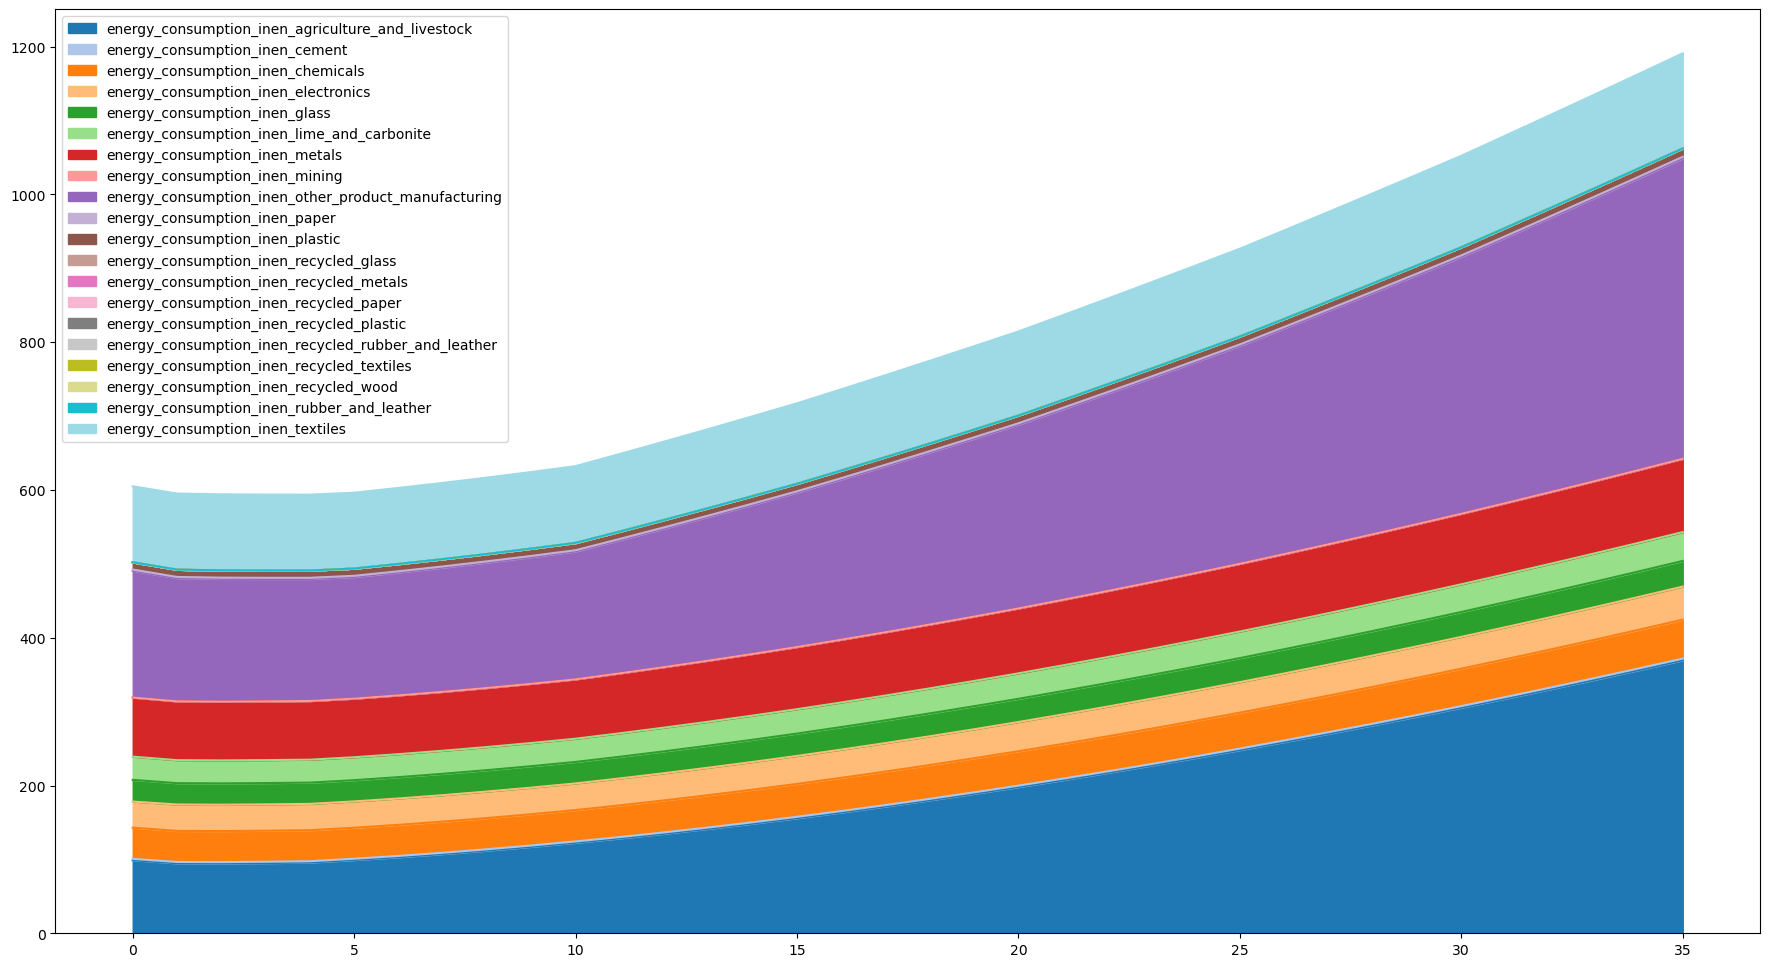

In [86]:
fig, ax = plt.subplots(figsize = (22, 12))
palette_func = plt.cm.tab20#plt.cm.hsv

df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    sisepuede.models.model_energy.modvar_inen_energy_consumption_total
)

m, n = df.shape
colors = [palette_func(x/n) for x in range(n)]



df.plot.area(ax = ax, color = colors)

In [103]:
s_o = [
    x for x in df_filt_intervention.columns 
    if "emission_co2e_" in x 
    and ("subsector_total" not in x) 
    and (
        ("_entc_" in x) 
        or ("_inen_" in x)
        or ("_scoe_" in x)
        or ("_ccsq_" in x)
        or ("_trns_" in x)
        or ("_enfu_" in x)
        or ("_fgtv_" in x)
    )
]
s_m = [x for x in df_filt_intervention_m.columns if "emission_co2e_" in x and ("subsector_total" not in x)]


In [66]:
df_in[[x for x in df_in.columns if x.startswith("totalvalue")]].columns

Index([], dtype='object')

In [158]:
#df_read = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/summary_energy_results_for_nidhi_sisepuede_run_2023-03-08T01;13;08.959671/summary_energy_results_for_nidhi_sisepuede_run_2023-03-08T01;13;08.959671.csv")

dfr = df_read[df_read["region"].isin(["chile"]) & df_read["variable"].isin(flds)]

dfr[dfr["primary_id"].isin([0]) & dfr["time_period"].isin([5])]["value"].sum()

88.47193769480012

In [159]:
dfr[dfr["primary_id"].isin([15015]) & dfr["time_period"].isin([5])]["value"].sum()


88.47193769480002

In [ ]:
###### df_out[df_out["primary_id"] == 0][[x for x in df_out.columns if ("energy_demand_enfu_total_fuel" in x) and ("demand" in x)]].iloc[0]


strat_id, strat_id_intervention = 0, 3001

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]


# intervention
dict_filt3 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt3.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt3)

df_filt_int = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]

#modvar = sisepuede.models.model_electricity.modvar_enfu_energy_demand_by_fuel_total
model_energy = sisepuede.models.model_energy
modvar = model_energy.modvar_enfu_energy_demand_by_fuel_inen#
modvar = "Energy Consumption from Industrial Energy"
modvar = "Energy Consumption from SCOE"
#modvar = model_energy.modvar_inen_emissions_co2
modvar = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4

df_test_0 = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    modvar
);

df_test_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_int,
    modvar
);



In [42]:
df_filt_intervention[
    [x for x in df_filt_intervention.columns if ("subsector_total" in x) and ("ccsq" in x)]
]

,emission_co2e_subsector_total_ccsq,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke,energy_demand_enfu_subsector_total_pj_ccsq_fuel_crude,energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel,energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity,energy_demand_enfu_subsector_total_pj_ccsq_fuel_furnace_gas,...,energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower,energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene,energy_demand_enfu_subsector_total_pj_ccsq_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_nuclear,energy_demand_enfu_subsector_total_pj_ccsq_fuel_ocean,energy_demand_enfu_subsector_total_pj_ccsq_fuel_oil,energy_demand_enfu_subsector_total_pj_ccsq_fuel_other,energy_demand_enfu_subsector_total_pj_ccsq_fuel_solar,energy_demand_enfu_subsector_total_pj_ccsq_fuel_waste,energy_demand_enfu_subsector_total_pj_ccsq_fuel_wind
2736,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2737,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2738,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2739,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2741,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2742,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2743,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2744,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2745,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
flds

['emission_co2e_subsector_total_ccsq',
 'emission_co2e_subsector_total_entc',
 'emission_co2e_subsector_total_fgtv',
 'emission_co2e_subsector_total_inen',
 'emission_co2e_subsector_total_scoe',
 'emission_co2e_subsector_total_trns']

In [10]:
modvar = sisepuede.models.model_energy.modvar_fgtv_frac_reduction_fugitive_leaks
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    #sisepuede.models.model_electricity.modvar_entc_nemomod_discounted_capital_investment
    #sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
)

In [9]:
df_out = sisepuede.read_output(None)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get("brazil").generate_future_from_lhs_vector(None, None, 0, True)



In [35]:

var = sisepuede.models.model_energy.modvar_inen_emissions_ch4
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["primary_id"] == 0], 
    var
).head()

,emission_co2e_ch4_inen_agriculture_and_livestock,emission_co2e_ch4_inen_cement,emission_co2e_ch4_inen_chemicals,emission_co2e_ch4_inen_electronics,emission_co2e_ch4_inen_glass,emission_co2e_ch4_inen_lime_and_carbonite,emission_co2e_ch4_inen_metals,emission_co2e_ch4_inen_other_product_manufacturing,emission_co2e_ch4_inen_paper,emission_co2e_ch4_inen_plastic,emission_co2e_ch4_inen_recycled_glass,emission_co2e_ch4_inen_recycled_metals,emission_co2e_ch4_inen_recycled_paper,emission_co2e_ch4_inen_recycled_plastic,emission_co2e_ch4_inen_recycled_rubber_and_leather,emission_co2e_ch4_inen_recycled_textiles,emission_co2e_ch4_inen_recycled_wood,emission_co2e_ch4_inen_rubber_and_leather,emission_co2e_ch4_inen_textiles
0,0.000652,0.157110,0.153208,0.000519,0.003897,0.000189,0.052969,0.000461,0.447092,0.002900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
1,0.000642,0.153350,0.159578,0.000535,0.003931,0.000169,0.051239,0.000361,0.453517,0.003039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000643
2,0.000642,0.153189,0.159410,0.000535,0.003926,0.000169,0.051184,0.000359,0.453048,0.003035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000642
3,0.000644,0.153027,0.159242,0.000534,0.003920,0.000168,0.051129,0.000358,0.452579,0.003031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
4,0.000644,0.152865,0.159073,0.000534,0.003915,0.000168,0.051073,0.000356,0.452108,0.003027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000640


In [34]:

var = sisepuede.models.model_energy.modvar_inen_en_prod_intensity_factor
sisepuede.model_attributes.get_standard_variables(
    df_in[df_in["strategy_id"] == 0], 
    var
).head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_textiles
0,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
1,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
2,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
3,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
4,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008


In [13]:

var = "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation"
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["time_period"] > 34], 
    var
)

,emission_co2e_co2_entc_generation_pp_biogas,emission_co2e_co2_entc_generation_pp_biomass,emission_co2e_co2_entc_generation_pp_coal,emission_co2e_co2_entc_generation_pp_gas,emission_co2e_co2_entc_generation_pp_geothermal,emission_co2e_co2_entc_generation_pp_hydropower,emission_co2e_co2_entc_generation_pp_nuclear,emission_co2e_co2_entc_generation_pp_ocean,emission_co2e_co2_entc_generation_pp_oil,emission_co2e_co2_entc_generation_pp_solar,emission_co2e_co2_entc_generation_pp_waste_incineration,emission_co2e_co2_entc_generation_pp_wind
0,0.0,22.522807,0.813540,57.079049,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0
1,0.0,20.109595,0.746509,70.568198,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0


In [59]:
regions = 
for region i
df_in

,future_id,time_period,strategy_id,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,0,0,851577000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
1,0,1,0,851577000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
2,0,2,0,851577000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
3,0,3,0,851577000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
4,0,4,0,851577000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,0,31,5002,851577000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
4064,0,32,5002,851577000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
4065,0,33,5002,851577000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8
4066,0,34,5002,851577000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,52.96,1.01,1.3,1.0,20.0,0.62,2.9,1.62,20.0,2.8


In [66]:
import sqlalchemy
import sql_utilities as su
importlib.reload(su)

#df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [64]:
model_afolu = sisepuede.models.model_afolu
model_circecon = sisepuede.models.model_circecon
model_energy = sisepuede.models.model_energy
model_ippu = sisepuede.models.model_ippu

# precursor function - can integrate with sisepuede or add in
def format_inputs(
    modvars_extract: Union[List[str], None],
    engine: sqlalchemy.engine.Engine,
    sisepuede_obj: ssp.SISEPUEDE,
    chunk_size: int = 10,
    force_overwrite_existing_primary_keys: bool = False,
    regions: Union[List[str], None] = None,
    table_name_attribute_primary: Union[str, None] = None,
    table_name_output: Union[str, None] = None,
) -> pd.DataFrame:
    """
    Retrieve inputs for merge
    
    Function Arguments
    ------------------
    """
    
    # table names
    table_name_attribute_primary = (
        sisepuede_obj.database.table_name_attribute_primary
        if not isinstance(table_name_attribute_primary, str)
        else table_name_attribute_primary
    )
    table_name_output = (
        sisepuede_obj.database.table_name_output
        if not isinstance(table_name_output, str)
        else table_name_output
    )
    
    # initialize regions
    field_region = sisepuede.key_region
    query = f"SELECT DISTINCT {field_region} FROM {table_name_output};"
    regions_avail = sqlutil.fetch_query_as_df(query, engine)
    
    # set and filter regions
    regions = (
        [x for x in sisepuede_obj.regions if x in regions]
        if sf.islistlike(regions)
        else sisepuede_obj.regions
    )
    regions = (
        [x for x in regions if x in list(regions_avail[field_region])]
        if regions_avail is not None
        else None
    )
    
    # get primary id info
    field_primary = sisepuede.key_primary
    query = f"SELECT DISTINCT {field_primary} FROM {table_name_output};"
    primary_ids_avail = sqlutil.fetch_query_as_df(query, engine)
    primary_ids_avail = (
        primary_ids_avail[field_primary]
        if primary_ids_avail is not None
        else None
    )
    
    
    # return none?
    return_none = regions is None
    return_none |= (len(regions) == 0) if (not return_none) else return_none
    return_none |= not (sf.islistlike(modvars_extract) | (modvars_extract is None))
    return_none |= primary_ids_avail is None
    return_none |= (len(primary_ids_avail) == 0) if (not return_none) else return_none
    
    if return_none:
        return None
    
    
    ##  PRIMARY SELECTION
    
    df_primary_keys = sisepuede_obj.odpt_primary.get_indexing_dataframe(
        key_values = primary_ids_avail
    )
    primary_keys = sisepuede_obj.get_primary_keys(list(df_primary_keys[sisepuede_obj.key_primary]))
    all_designs = list(df_primary_keys[sisepuede_obj.key_design].unique())
    
    # initializations
    df_out = []
    df_out_primary = []
    iterate_outer = 0

    # available indices and resolution
    idt = sisepuede_obj.database.db.dict_iterative_database_tables.get(
        sisepuede_obj.database.table_name_input
    )
    index_conflict_resolution = None
    index_conflict_resolution = "write_replace" if (force_overwrite_existing_primary_keys or (idt.index_conflict_resolution == "write_replace")) else None
    set_available_ids = idt.available_indices


    # 
    fields_ext = None
    if modvars_extract is not None:
        fields_ext = []
        for modvar in modvars_extract:
            fields_ext += sisepuede_obj.model_attributes.build_varlist(
                None,
                modvar
            )
    
    
    for region in regions:

        iterate_inner = 0

        # retrieve region specific future trajectories and lhs design
        future_trajectories_cur = sisepuede_obj.experimental_manager.dict_future_trajectories.get(region)
        lhs_design_cur = sisepuede_obj.experimental_manager.dict_lhs_design.get(region)
        region_out = sisepuede_obj.get_output_region(region)

        sisepuede_obj._log(f"\n***\t BUILDING INPUTS FOR REGION {region}\t***\n", type_log = "info")


        for design in all_designs:

            df_lhs_l, df_lhs_x = lhs_design_cur.retrieve_lhs_tables_by_design(
                design,
                return_type = pd.DataFrame
            )

            # get reduced set of primary keys
            df_primary_keys_cur_design = df_primary_keys[
                df_primary_keys[sisepuede_obj.key_design] == design
            ]
            keep_futures = sorted(list(set(df_primary_keys_cur_design[sisepuede_obj.key_future])))

            # reduce lhs tables - LEs
            df_lhs_l = (
                df_lhs_l[
                    df_lhs_l[sisepuede_obj.key_future].isin(keep_futures)
                ] 
                if (df_lhs_l is not None) 
                else df_lhs_l
            )
            
            # Xs
            df_lhs_x = (
                df_lhs_x[
                    df_lhs_x[sisepuede_obj.key_future].isin(keep_futures)
                ] 
                if (df_lhs_x is not None) 
                else df_lhs_x
            )

            # next, loop over futures
            #  Note that self.generate_future_from_lhs_vector() will return a table for all strategies
            #  associated with the future, so we can prevent redundant calls by running all strategies
            #  that need to be run for a given future

            for future in keep_futures:

                # determine if baseline future and fetch lhs rows
                base_future_q = (future == sisepuede_obj.baseline_future)
                lhs_l = df_lhs_l[df_lhs_l[sisepuede_obj.key_future] == future].iloc[0] if ((df_lhs_l is not None) and not base_future_q) else None
                lhs_x = df_lhs_x[df_lhs_x[sisepuede_obj.key_future] == future].iloc[0] if ((df_lhs_x is not None) and not base_future_q) else None

                # generate the futures and get available strategies
                df_input = future_trajectories_cur.generate_future_from_lhs_vector(
                    lhs_x,
                    df_row_lhc_sample_l = lhs_l,
                    future_id = future,
                    baseline_future_q = base_future_q
                )
                all_strategies = sorted(list(
                    set(df_input[sisepuede_obj.key_strategy])
                ))


                for strategy in all_strategies:

                    # get primary id info
                    df_primary_keys_cur_design_fs = df_primary_keys_cur_design[
                        (df_primary_keys_cur_design[sisepuede_obj.key_future] == future) &
                        (df_primary_keys_cur_design[sisepuede_obj.key_strategy] == strategy)
                    ].reset_index(drop = True)

                    id_primary = df_primary_keys_cur_design_fs[sisepuede_obj.key_primary]
                    id_primary = int(id_primary.iloc[0]) if (len(id_primary) > 0) else None
                    write_q = ((region_out, id_primary) not in set_available_ids) or (index_conflict_resolution == "write_replace")
                    tup = (region_out, id_primary)

                    if (id_primary in primary_keys) and write_q:

                        # filter the data frame down
                        df_input_cur = (
                            df_input[
                                df_input[sisepuede_obj.key_strategy].isin([strategy])
                            ]
                            .copy()
                            .reset_index(drop = True)
                            .sort_values(by = [sisepuede_obj.model_attributes.dim_time_period])
                            .drop([x for x in df_input.columns if x in sisepuede_obj.keys_index], axis = 1)
                        )
                        
                        if fields_ext is not None:
                            df_input_cur.drop(
                                [
                                    x for x in df_input_cur.columns 
                                    if (x not in fields_ext)
                                    & (x != sisepuede_obj.model_attributes.dim_time_period) 
                                ], 
                                axis = 1,
                                inplace = True
                            )

                        df_input_cur = sf.add_data_frame_fields_from_dict(
                            df_input_cur,
                            {
                                sisepuede_obj.key_region: region_out,
                                sisepuede_obj.key_primary: id_primary
                            },
                            prepend_q = True
                        )
                        df_out.append(df_input_cur)
        

    df_out = (
        pd.concat(df_out, axis = 0).reset_index(drop = True)
        if len(df_out) > 0
        else None
    )
    
    return df_out




def get_modvars_to_save(
) -> List[str]:

    # get model variables to keep
    modvars = []
    for subsec in ["Economy", "General"]:
        modvars += sisepuede.model_attributes.get_subsector_variables(subsec, var_type = "input")[1]
    

    ##  AFOLU variables
    
    modvars += [
        model_afolu.modvar_agrc_emissions_ch4_rice,
        model_afolu.modvar_agrc_frac_residues_removed,
        model_afolu.modvar_agrc_frac_no_till, # conservation ag
        model_afolu.modvar_lndu_emissions_conv,
        model_afolu.modvar_lndu_frac_pastures_improved,
        model_afolu.modvar_lsmm_rf_biogas,
        model_afolu.modvar_lvst_ef_ch4_ef,
    ]
    
    modvars += model_afolu.modvar_list_lvst_mm_fractions
    
    
        
    ##  CircularEconomy variables
    modvars += [
        v.get("treatment_fraction") 
        for v in model_circecon.dict_trww_categories_to_wali_fraction_variables.values()
    ]
    
    modvars += [
        model_circecon.modvar_trww_rf_biogas_recovered,
        model_circecon.modvar_waso_frac_landfill_gas_ch4_to_energy,
        model_circecon.modvar_waso_frac_recovered_for_energy_incineration_isw,
        model_circecon.modvar_waso_frac_recovered_for_energy_incineration_msw,
        model_circecon.modvar_waso_rf_landfill_gas_recovered,
        model_circecon.modvar_waso_waste_per_capita_scalar
    ]
    
    
    ##  Energy variables
    
    modvars += [
        model_energy.modvar_fgtv_frac_non_fugitive_flared,
        model_energy.modvar_fgtv_frac_reduction_fugitive_leaks,
        model_energy.modvar_inen_demscalar,
        model_energy.modvar_enfu_efficiency_factor_industrial_energy,

        # SCOE
        model_energy.modvar_scoe_demscalar_elec_energy_demand,
        model_energy.modvar_scoe_demscalar_heat_energy_demand,
        model_energy.modvar_scoe_efficiency_fact_heat_en_coal,
        model_energy.modvar_scoe_efficiency_fact_heat_en_diesel,
        model_energy.modvar_scoe_efficiency_fact_heat_en_electricity,
        model_energy.modvar_scoe_efficiency_fact_heat_en_gasoline,
        model_energy.modvar_scoe_efficiency_fact_heat_en_hydrogen,
        model_energy.modvar_scoe_efficiency_fact_heat_en_kerosene,
        model_energy.modvar_scoe_efficiency_fact_heat_en_natural_gas,
        model_energy.modvar_scoe_efficiency_fact_heat_en_hgl,
        model_energy.modvar_scoe_efficiency_fact_heat_en_solid_biomass,
        
        # TRNS
        model_energy.modvar_trns_fuel_efficiency_biofuels,
        model_energy.modvar_trns_fuel_efficiency_diesel,
        model_energy.modvar_trns_fuel_efficiency_gasoline,
        model_energy.modvar_trns_fuel_efficiency_hgl,
        model_energy.modvar_trns_fuel_efficiency_hydrogen,
        model_energy.modvar_trns_fuel_efficiency_kerosene,
        model_energy.modvar_trns_fuel_efficiency_natural_gas,
        model_energy.modvar_trns_electrical_efficiency
    ]
    
    ##  IPPU variables
    
    modvars += [
        model_ippu.modvar_ippu_clinker_fraction_cement,
        model_ippu.modvar_ippu_capture_efficacy_co2,
        model_ippu.modvar_ippu_capture_prevalence_co2,
        model_ippu.modvar_ippu_scalar_production
    ]
    
    # add in FC emission factors
    modvars += sum(model_ippu.dict_fc_ef_modvars_by_type.values(), [])
    
    
    return modvars




In [65]:
import sql_utilities as sqlutil

vars_extract = sisepuede.model_attributes.build_varlist("Energy Technology", "NemoMod Discounted Capital Investment")
df_out = sisepuede.read_output(None)
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")


# check output directory 
dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"sisepuede_summary_results_run_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None



# add in input variables
modvars_save = get_modvars_to_save()
df_in_merge = format_inputs(modvars_save, engine, sisepuede) # TEMP


subsectors = []
for sector in sorted(list(set(sisepuede.model_attributes.all_sectors))):#["Energy", "IPPU", ]:
    subsectors += sisepuede.model_attributes.get_sector_subsectors(sector)
attr_subsec = sisepuede.model_attributes.dict_attributes.get("abbreviation_subsector")
dict_subsector_name_to_abv = attr_subsec.field_maps.get(f"subsector_to_{attr_subsec.key}")


# index fields
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]


# build variable extract
vars_extract += [f"emission_co2e_subsector_total_{dict_subsector_name_to_abv.get(x)}" for x in subsectors]
for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur
    
vars_extract += [x for x in df_in_merge.columns if x not in fields_ind]



# export outputs only before merge
flds_ind_out = [x for x in fields_ind if x in df_out.columns]
flds_sort_out = sorted([x for x in vars_extract if x in df_out.columns])

df_out[flds_ind_out + flds_sort_out].to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_OUTPUTS_ONLY.csv"),
    index = None,
    encoding = "UTF-8"
)


# export inputs only before merge
flds_ind_in = [x for x in fields_ind if x in df_in_merge.columns]
flds_sort_in = sorted([x for x in vars_extract if x in df_in_merge.columns])

df_in_merge[flds_ind_in + flds_sort_in].to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_ONLY.csv"),
    index = None,
    encoding = "UTF-8"
)


# finally, merge and export
df_melt = pd.merge(
    df_out,
    df_in_merge
)
fields_ext = sorted([x for x in vars_extract if x in df_melt.columns])
df_melt = df_melt[fields_ind + fields_ext];

df_melt.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)


# melt
"""
df_melt = pd.melt(
    df_melt,
    fields_ind,
    fields_ext
)

    
df_melt.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_LONG.csv"),
    index = None,
    encoding = "UTF-8"
)

""";

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)


2023-07-07 10:43:29,092 - INFO - 
***	 BUILDING INPUTS FOR REGION argentina	***

2023-07-07 10:43:29,092 - INFO - 
***	 BUILDING INPUTS FOR REGION argentina	***

2023-07-07 10:43:31,436 - INFO - 
***	 BUILDING INPUTS FOR REGION bolivia	***

2023-07-07 10:43:31,436 - INFO - 
***	 BUILDING INPUTS FOR REGION bolivia	***

2023-07-07 10:43:33,851 - INFO - 
***	 BUILDING INPUTS FOR REGION brazil	***

2023-07-07 10:43:33,851 - INFO - 
***	 BUILDING INPUTS FOR REGION brazil	***

2023-07-07 10:43:36,144 - INFO - 
***	 BUILDING INPUTS FOR REGION chile	***

2023-07-07 10:43:36,144 - INFO - 
***	 BUILDING INPUTS FOR REGION chile	***

2023-07-07 10:43:38,262 - INFO - 
***	 BUILDING INPUTS FOR REGION colombia	***

2023-07-07 10:43:38,262 - INFO - 
***	 BUILDING INPUTS FOR REGION colombia	***

2023-07-07 10:43:40,729 - INFO - 
***	 BUILDING INPUTS FOR REGION costa_rica	***

2023-07-07 10:43:40,729 - INFO - 
***	 BUILDING INPUTS FOR REGION costa_rica	***

2023-07-07 10:43:43,402 - INFO - 
***	 BUILDIN

In [100]:
df_check = df_out_all[
    df_out_all["region"].isin(["el_salvador"])
    & df_out_all["primary_id"].isin([125125])
]

def check_model_results2(#self,
    df_results: pd.DataFrame,
    verification_function: Callable,
    fields_index: Union[List[str], None] = None,
    epsilon: float = 10**(-6),
    fields_check: Union[List[str], str, None] = None,
    ignore_nas: bool = False,
    output_only: bool = True,
    thresholds: Tuple[float, float] = (10**(-5), 10**6),
) -> Union[bool, None]:
    """
    Verify numerical integrity of results by looking for fields that include 
        extreme outliers based on the skew function defined. 

    Returns:
        * True: if *no* columnar values of verification_function are outside
            acceptable bounds as defined by thresholds
        * False: if *any* columnar values of verification_function are 
            outside acceptable bounds as defined by thresholds
        * None: if any function input elements are misspecified

    Function Arguments
    ------------------
    - df_results: data frame containing raw output results to verify
    - verification_function: function that is applied along axis to verify 
        values and compare against thresholds

    Keyword Arguments
    ------------------
    - epsilon: numerical value used to determine error in sf.vec_bounds 
        comparison
    - fields_check: optional specification of:
        * subset of fields to check (listlike)
        * "emissions_output" (to only check emissions output fields) 
            * NOT SUPPORTED AT MOMENT
        * "emissions_output_subsector_aggregate" (to only check subsector
            emission aggregate fields) 
        * None (to check all fields not associated with fields_ind)
        * NOTE: If any elements intersect with fields_ind, fields_ind takes 
            priority
    - fields_index: fields to treat as index fields (exempt from checking). 
        If None, check every field in the data frame. If None, uses all 
        indices 
    - output_only: check only output fields
    - thresholds: Tuple specifying lower and upper limits of 
        verification_function value
    """

    # check fields and threshold specification
    return_none = not (thresholds[0] < thresholds[1])
    return_none |= not isinstance(df_results, pd.DataFrame)
    return_none |= not (
        (sf.islistlike(fields_index) or (fields_index is None))
        if not isinstance(fields_index, str)
        else (fields_index.lower() in ["emissions_output", "emissions_output_subsector_aggregate"])
    )
    return_none |= not isinstance(verification_function, Callable)
    if return_none:
        return None

    # set index and check fields; return True if no valid check fields are found
    fields_index = (
        [
            x for x in sisepuede.model_attributes.sort_ordered_dimensions_of_analysis
            if x in df_results.columns 
        ]
        if fields_index is None
        else fields_index
    )
    fields_index = [x for x in fields_index if (x in df_results.columns)]

    # set fields to check
    fields_check = (
        fields_check
        if not isinstance(fields_check, str)
        else (
            sisepuede.model_attributes.get_all_subsector_emission_total_fields()
            if fields_check == "emissions_output_subsector_aggregate"
            else None
        )
    )
    fields_check = (
        [x for x in df_results.columns if x not in fields_index]
        if not sf.islistlike(fields_check)
        else [x for x in fields_check if (x not in fields_index) and (x in df_results.columns)]
    )
    fields_check = (
        [x for x in fields_check if x in sisepuede.model_attributes.all_variables_output]
        if output_only
        else fields_check
    )
    if len(fields_check) == 0:
        return True


    # apply verification function to columns, then determine if any values fall outside of specified thresholds
    arr_verify = np.array(df_results[fields_check])    
    out = np.abs(np.apply_along_axis(verification_function, 0, arr_verify))
    w = np.where(out != 0)
    out = out[out != 0.0]

    out_compare = sf.vec_bounds(out, thresholds)
    #out = np.abs(out - out_compare).max() <= epsilon
    
    vec_thresh_discrepancy = np.abs(out - out_compare)
    vec_thresh_discrepancy = (
        vec_thresh_discrepancy[~np.isnan(vec_thresh_discrepancy)]
        if ignore_nas
        else vec_thresh_discrepancy
    )

    check_val = vec_thresh_discrepancy.max() <= epsilon

    return check_val, out, out_compare, np.array(fields_check)[w]


tup = check_model_results2(df_check, sf.mean_median_ratio, fields_check = "emissions_output_subsector_aggregate", ignore_nas = True)
tup[0]

True

In [98]:
cv, out, out_compare, flds = tup
cv

False

In [91]:
df_check[[x for x in df_check if ("prod" in x) & ("ippu" in x) & ("emission" not in x)]].tail()

,prod_ippu_cement_tonne,prod_ippu_chemicals_tonne,prod_ippu_electronics_tonne,prod_ippu_glass_tonne,prod_ippu_lime_and_carbonite_tonne,prod_ippu_metals_tonne,prod_ippu_mining_tonne,prod_ippu_paper_tonne,prod_ippu_plastic_tonne,prod_ippu_rubber_and_leather_tonne,prod_ippu_textiles_tonne,prod_ippu_wood_tonne,qty_ippu_recycled_glass_used_in_production_tonne,qty_ippu_recycled_metals_used_in_production_tonne,qty_ippu_recycled_paper_used_in_production_tonne,qty_ippu_recycled_plastic_used_in_production_tonne,qty_ippu_recycled_rubber_and_leather_used_in_production_tonne,qty_ippu_recycled_textiles_used_in_production_tonne,qty_ippu_recycled_wood_used_in_production_tonne
3451,1.161906e+07,64113.208287,134407.223116,1689.641177,0.0,916038.020365,115078.136123,601317.406853,185136.753774,0.0,145510.656740,1.374124e+06,6758.564707,39249.176290,249015.186544,196245.881452,4675.061815,25499.209066,61076.375171
3452,1.172019e+07,64305.836041,135577.043780,1700.563514,0.0,922730.277749,116079.725014,596351.385264,180345.451994,0.0,145391.806213,1.364394e+06,6802.254058,40871.313597,259914.980825,204356.567987,4715.751472,26470.032176,63451.440456
3453,1.180441e+07,64499.145305,136551.366094,1709.991328,0.0,928036.537092,116913.930151,590505.217151,175016.864599,0.0,145193.950163,1.353999e+06,6839.965313,42489.962092,270831.000285,212449.810461,4749.641147,27433.815313,65812.382657
3454,1.187187e+07,64691.824159,137331.657596,1717.930475,0.0,931967.510987,117582.008024,583786.416768,169156.566837,0.0,144916.284684,1.342953e+06,6871.721901,44104.839556,281760.606345,220524.197779,4776.781883,28390.518306,68159.013352
3455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_check[[x for x in df_check if ("emission_co2e" in x) & ("ippu" in x)]].tail()


,emission_co2e_c2f6_ippu_product_use_product_use_ods_other,emission_co2e_c2f6_ippu_production_chemicals,emission_co2e_c2f6_ippu_production_electronics,emission_co2e_c2f6_ippu_production_metals,emission_co2e_c2h3f3_ippu_product_use_product_use_ods_refrigeration,emission_co2e_c2h3f3_ippu_production_chemicals,emission_co2e_c2hf5_ippu_product_use_product_use_ods_other,emission_co2e_c2hf5_ippu_product_use_product_use_ods_refrigeration,emission_co2e_c2hf5_ippu_production_chemicals,emission_co2e_c3f8_ippu_production_chemicals,...,emission_co2e_other_fcs_ippu_production_electronics,emission_co2e_pfcs_ippu_product_use_product_use_ods_other,emission_co2e_pfcs_ippu_production_chemicals,emission_co2e_pfcs_ippu_production_electronics,emission_co2e_pfcs_ippu_production_other_product_manufacturing,emission_co2e_sf6_ippu_production_chemicals,emission_co2e_sf6_ippu_production_electronics,emission_co2e_sf6_ippu_production_metals,emission_co2e_sf6_ippu_production_other_product_manufacturing,emission_co2e_subsector_total_ippu
3451,0.0,0.0,0.0,0.0,0.025108,0.0,0.009335,0.009335,0.0,0.0,...,0.000018,0.0,0.0,1.537053e-06,0.0,0.0,0.0,0.0,0.0,2.893004
3452,0.0,0.0,0.0,0.0,0.021533,0.0,0.008005,0.008005,0.0,0.0,...,0.000016,0.0,0.0,1.321679e-06,0.0,0.0,0.0,0.0,0.0,2.699676
3453,0.0,0.0,0.0,0.0,0.017901,0.0,0.006655,0.006655,0.0,0.0,...,0.000013,0.0,0.0,1.100781e-06,0.0,0.0,0.0,0.0,0.0,2.503106
3454,0.0,0.0,0.0,0.0,0.014219,0.0,0.005286,0.005286,0.0,0.0,...,0.000010,0.0,0.0,8.753586e-07,0.0,0.0,0.0,0.0,0.0,2.304120
3455,0.0,NaN,NaN,NaN,0.010495,NaN,0.003902,0.003902,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_check[flds]

,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_entc,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_fgtv,emission_co2e_subsector_total_ippu,emission_co2e_subsector_total_inen,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_soil,emission_co2e_subsector_total_waso,emission_co2e_subsector_total_scoe,emission_co2e_subsector_total_trns,emission_co2e_subsector_total_trww
3420,1.720159,0.068174,-2.275203,0.350117,4.709453,10.297048,3.376670,1.997404,0.233717,0.750805,2.255971,0.092698,4.543794,1.146327
3421,1.751696,0.063774,-2.320229,0.364562,5.013667,10.872877,3.424794,1.937706,0.226627,0.796872,2.321094,0.094129,4.537241,1.141668
3422,1.769151,0.079307,-2.280288,0.396193,5.355539,11.596444,3.470622,1.881341,0.219873,0.812234,2.381334,0.095576,4.578031,1.137484
3423,1.744358,0.094633,-2.420674,0.421763,4.759242,11.960261,3.514138,1.840346,0.221829,0.862827,2.438432,0.097035,4.613361,1.161375
3424,1.875471,0.103673,-2.345070,0.394479,4.886046,11.577474,3.555331,1.784058,0.211505,0.889646,2.490227,0.098504,4.702476,1.144208
3425,1.834327,0.117303,-2.369959,0.380401,5.295487,11.453727,3.594187,1.737486,0.206180,0.917305,2.539536,0.102302,4.663958,1.142866
3426,1.847829,0.182297,-2.568984,0.401284,5.430030,11.806315,3.630701,1.693628,0.201119,0.944190,2.589221,0.105062,4.714980,1.128879
3427,1.862251,0.219923,-2.616387,0.415490,5.595239,12.160186,3.664866,1.652522,0.196425,0.970148,2.640238,0.107447,4.815865,1.128244
3428,1.877588,0.210278,-2.656004,0.435289,5.756775,12.515653,3.696682,1.613957,0.192023,0.994363,2.689297,0.109838,4.938578,1.128066
3429,1.893836,0.219208,-2.695217,0.455693,5.918598,12.872348,3.726147,1.577820,0.187901,1.016199,2.736669,0.112235,5.061699,1.128326
